In [15]:
import nesdis_aws
import nesdis_gml_synergy.satlab as ngs
import atmPy.data_archives.NOAA_ESRL_GMD_GRAD.surfrad.surfrad as surfrad
import os
os.getpid()

209685

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Product development

## How to make nesdis-gml-syntergy recognize a new porduct?

### download a file

In [4]:
product = 'AOD' #FDC
satellite = 16
path2folder_local=f'/export/htelg/data/nesdis/goes/ABI_L2_{product}/'
# pl.Path(path2folder_local).mkdir()
query = nesdis_aws.AwsQuery(path2folder_local=path2folder_local,
                            satellite=satellite,
                            product=f'ABI-L2-{product}',
                            scan_sector='C',
                            # start='2020-09-30 18:00:00',
                            # end='2020-09-30 19:35:00',
                            start='2020-09-13 18:00:00',
                            # end='2018-11-01 00:00:00',
                            end='2020-09-13 18:05:00',
                            verbose = True
                           )

In [5]:
query.workplan

Get workplan:
workplan done


,path2file_aws,path2file_local
2020-09-13 18:01:15,noaa-goes16/ABI-L2-AODC/2020/257/18/OR_ABI-L2-...,/export/htelg/data/nesdis/goes/ABI_L2_AOD/OR_A...


In [10]:
query.workplan.path2file_aws.iloc[0]

PosixPath('noaa-goes17/ABI-L2-LSTC/2020/257/18/OR_ABI-L2-LSTC-M6_G17_s20202571801176_e20202571803549_c20202571804341.nc')

In [8]:
query.workplan.path2file_local.iloc[0]

PosixPath('/export/htelg/data/nesdis/goes/ABI_L2_AOD/OR_ABI-L2-AODC-M6_G16_s20202571801154_e20202571803527_c20202571806364.nc')

In [6]:
print(query.info_on_current_query())

no of files: 1
estimated disk usage: 7 mb
remaining disk space after download: 57 %



In [49]:
query.product_available_since

Timestamp('2018-08-28 00:00:00')

In [7]:
query.download()


[None]

### open the file 

In [28]:
reload(ngs)

<module 'nesdis_gml_synergy.satlab' from '/mnt/telg/prog/nesdis_gml_synergy/nesdis_gml_synergy/satlab.py'>

In [29]:
ds.close()
sat_ds.ds.close()

In [20]:
# sat_ds = ngs.open_file('/mnt/telg/data/nesdis/goes/ABI_L2_DSR/OR_ABI-L2-DSRC-M6_G16_s20211431801169_e20211431803542_c20211431810229.nc', verbose=True)
# sat_ds = ngs.open_file('/mnt/telg/data/nesdis/goes/ABI_L2_CTP/OR_ABI-L2-CTPC-M6_G16_s20211431801169_e20211431803542_c20211431805355.nc', verbose=True)
# sat_ds = ngs.open_file('/mnt/telg/data/nesdis/goes/ABI_L2_ACM/OR_ABI-L2-ACMC-M3_G16_s20182131802224_e20182131804597_c20182131805209.nc', verbose = True)
# sat_ds = ngs.open_file('/mnt/telg/data/nesdis/goes/ABI_L2_AOD/OR_ABI-L2-AODC-M6_G16_s20211431801169_e20211431803542_c20211431805298.nc', verbose = True)
# sat_ds = ngs.open_file('/mnt/telg/data/nesdis/goes/ABI_L2_COD/OR_ABI-L2-CODC-M6_G16_s20202741201163_e20202741203536_c20202741206020.nc', verbose = True)
# p2f = pl.Path(f'/nfs/stu3data2/Satellite_data/goes/16/')'/mnt/telg/data/nesdis/goes/ABI_L2_AOD/OR_ABI-L2-AODC-M6_G17_s20202571801176_e20202571803549_c20202571805549.nc'
# p2f = pl.Path(f'/mnt/telg/data/nesdis/goes/ABI_L2_LST/OR_ABI-L2-LSTC-M6_G17_s20202571801176_e20202571803549_c20202571804341.nc')
p2f = pl.Path(f'/mnt/telg/data/nesdis/goes/ABI_L2_FDC/OR_ABI-L2-FDCC-M6_G16_s20202571801154_e20202571803527_c20202571804206.nc')
p2f = pl.Path('/export/htelg/data/nesdis/goes/ABI_L2_AOD/OR_ABI-L2-AODC-M6_G16_s20202571801154_e20202571803527_c20202571806364.nc')
p2f = pl.Path('/export/htelg/tmp/OR_ABI-L2-AODC-M3_G17_s20190011902190_e20190011904563_c20190011906177.nc')

sat_ds = ngs.open_file(p2f)

In [21]:
sat_ds.ds

<xarray.Dataset>
Dimensions:                                                 (y: 1500, x: 2500,
                                                             number_of_time_bounds: 2,
                                                             number_of_image_bounds: 2,
                                                             number_of_sunglint_angle_bounds: 2,
                                                             number_of_LZA_bounds: 2,
                                                             number_of_SZA_bounds: 2,
                                                             land_sensor_bands: 3,
                                                             sea_sensor_bands: 4,
                                                             latitude_bands: 18,
                                                             number_of_latitude_band_bounds: 2,
                                                             num_area_types: 2)
Coordinates:
    t                                                       datetime64[ns] ...
  * y                                                       (y) float64 0.128...
  * x                                                       (x) float64 -0.06...
    y_image                                                 float32 ...
    x_image                                                 float32 ...
    sunglint_angle                                          float32 ...
    retrieval_local_zenith_angle                            float32 ...
    quantitative_local_zenith_angle                         float32 ...
    retrieval_solar_zenith_angle                            float32 ...
    quantitative_solar_zenith_angle                         float32 ...
    aod_product_wavelength                                  float32 ...
  * latitude_bands                                          (latitude_bands) float32 ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                number_of_sunglint_angle_bounds,
                                number_of_LZA_bounds, number_of_SZA_bounds,
                                land_sensor_bands, sea_sensor_bands,
                                number_of_latitude_band_bounds, num_area_types
Data variables: (12/59)
    AOD                                                     (y, x) float32 ...
    DQF                                                     (y, x) float32 ...
    time_bounds                                             (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                                  int32 ...
    y_image_bounds                                          (number_of_image_bounds) float32 ...
    x_image_bounds                                          (number_of_image_bounds) float32 ...
    ...                                                      ...
    lat_band_min_aod550_sea                                 (latitude_bands) float32 ...
    lat_band_max_aod550_sea                                 (latitude_bands) float32 ...
    lat_band_mean_aod550_sea                                (latitude_bands) float32 ...
    lat_band_std_dev_aod550_sea                             (latitude_bands) float32 ...
    percent_uncorrectable_GRB_errors                        float32 ...
    percent_uncorrectable_L0_errors                         float32 ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v25, 05 July 2013)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2019-01-01T19:02:19.0Z
    time_coverage_end:         2019-01-01T19:04:56.3Z
    timeline_id:               ABI Mode 3
    production_data_source:    Realtime
    id:          

In [22]:
# check if the valid 2d variables are among the variables you would like?
sat_ds.valid_2D_variables

['AOD']

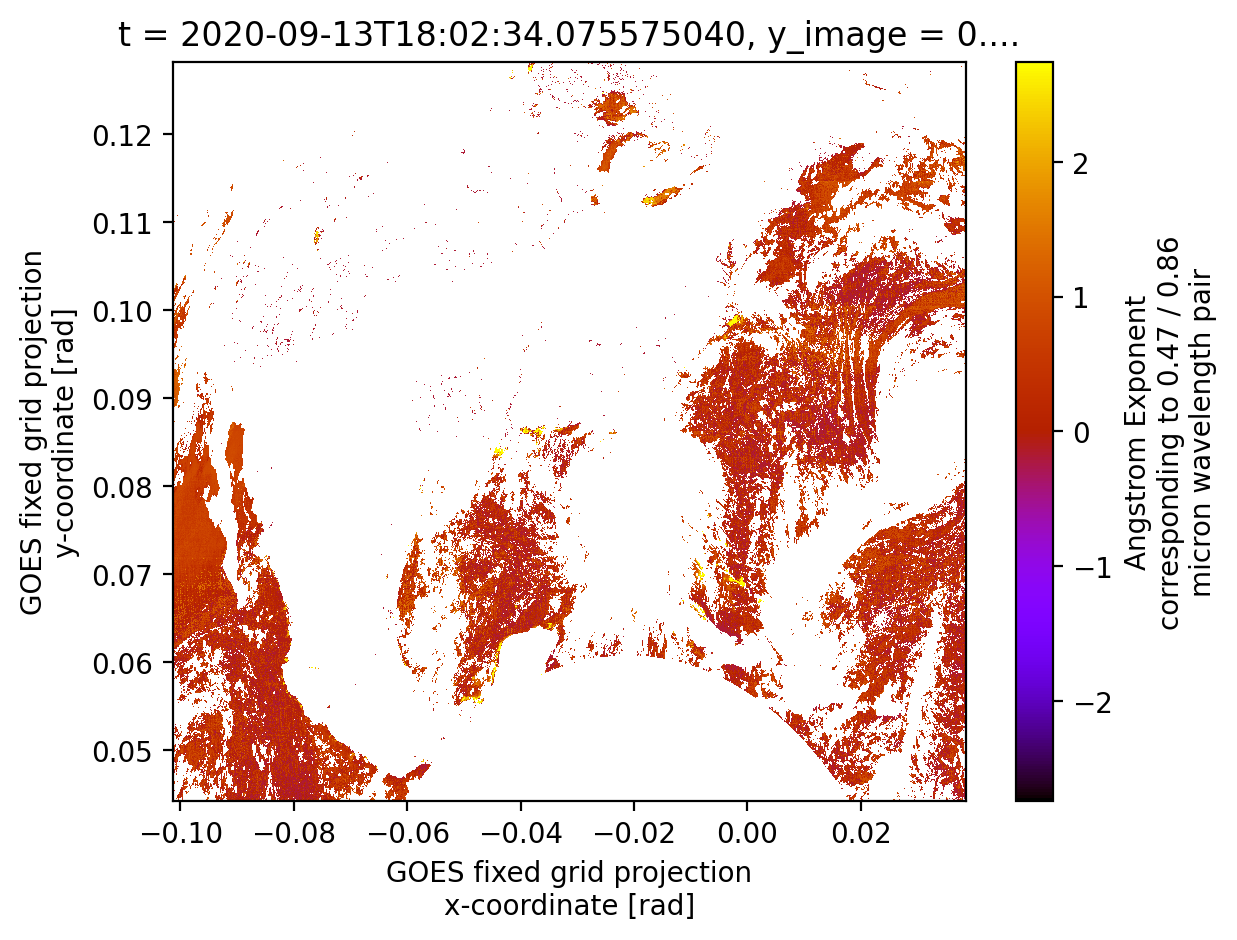

In [13]:
sat_ds.ds.AE1.plot(cmap = plt.cm.gnuplot)

In [16]:
proj = sat_ds.project_on_sites(surfrad.network.stations)

In [17]:
proj.projection2point

<xarray.Dataset>
Dimensions:                     (site: 7)
Coordinates:
  * site                        (site) object 'BND' 'SXF' 'TBL' ... 'GWN' 'PSU'
Data variables: (12/14)
    AOD                         (site) float32 1.735 0.04178 0.1201 ... nan nan
    AOD_DQF_assessed            (site) int8 2 0 0 3 3 3 3
    AE1                         (site) float32 nan nan nan nan nan nan nan
    AE1_DQF_assessed            (site) int8 2 0 0 3 3 3 3
    AE2                         (site) float32 nan nan nan nan nan nan nan
    AE2_DQF_assessed            (site) int8 2 0 0 3 3 3 3
    ...                          ...
    argmin_y                    (site) float32 1.273e+03 1.014e+03 ... 1.692e+03
    lon_gritpoint               (site) float32 -88.38 -96.61 ... -89.88 -77.93
    lat_gridpoint               (site) float32 40.06 43.74 40.12 ... 34.25 40.71
    lon_station                 (site) float32 -88.37 -96.62 ... -89.87 -77.93
    lat_station                 (site) float32 40.05 43.73 40.12 ... 34.25 40.72
    distance_station_gridpoint  (site) float32 1.232 1.564 ... 0.4816 1.185
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2020-09-13T18:01:15.4Z
    time_coverage_end:         2020-09-13T18:03:52.7Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        bec5c4f3-bfec-4cc2-af29-921b833d3b87

In [18]:
proj.projection2area

<xarray.Dataset>
Dimensions:              (radius: 5, stats: 3, data_quality: 5, site: 7)
Coordinates:
  * radius               (radius) int64 5 10 25 50 100
  * stats                (stats) object 'median' 'mean' 'std'
    t                    datetime64[ns] 2020-09-13T18:02:34.075575040
  * site                 (site) <U3 'BND' 'SXF' 'TBL' 'DRA' 'FPK' 'GWN' 'PSU'
  * data_quality         (data_quality) <U15 'high' 'high_medium' ... 'low'
Data variables:
    AOD                  (data_quality, radius, stats, site) float32 nan ... nan
    AE1                  (data_quality, radius, stats, site) float32 nan ... nan
    AE2                  (data_quality, radius, stats, site) float32 nan ... nan
    num_of_valid_points  (data_quality, radius, site) int64 12 10 ... 5289 4839

In [ ]:
proj.

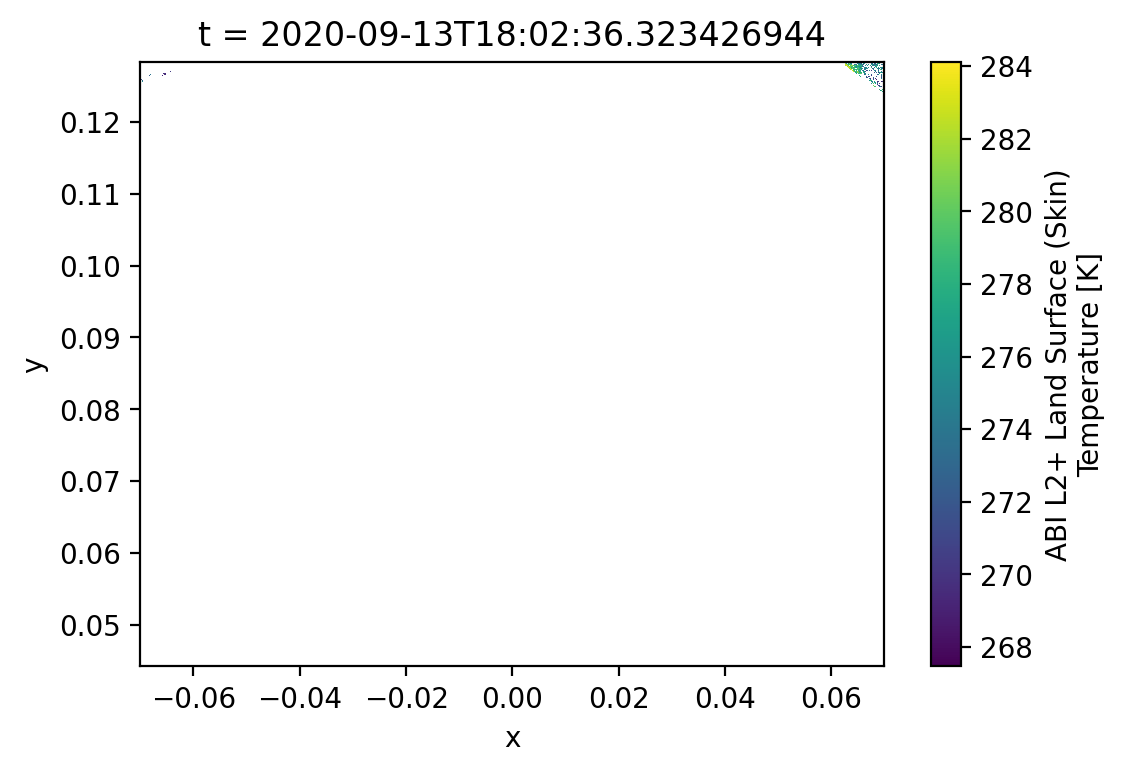

In [36]:
sat_ds.data_by_quality_medium.LST.plot()

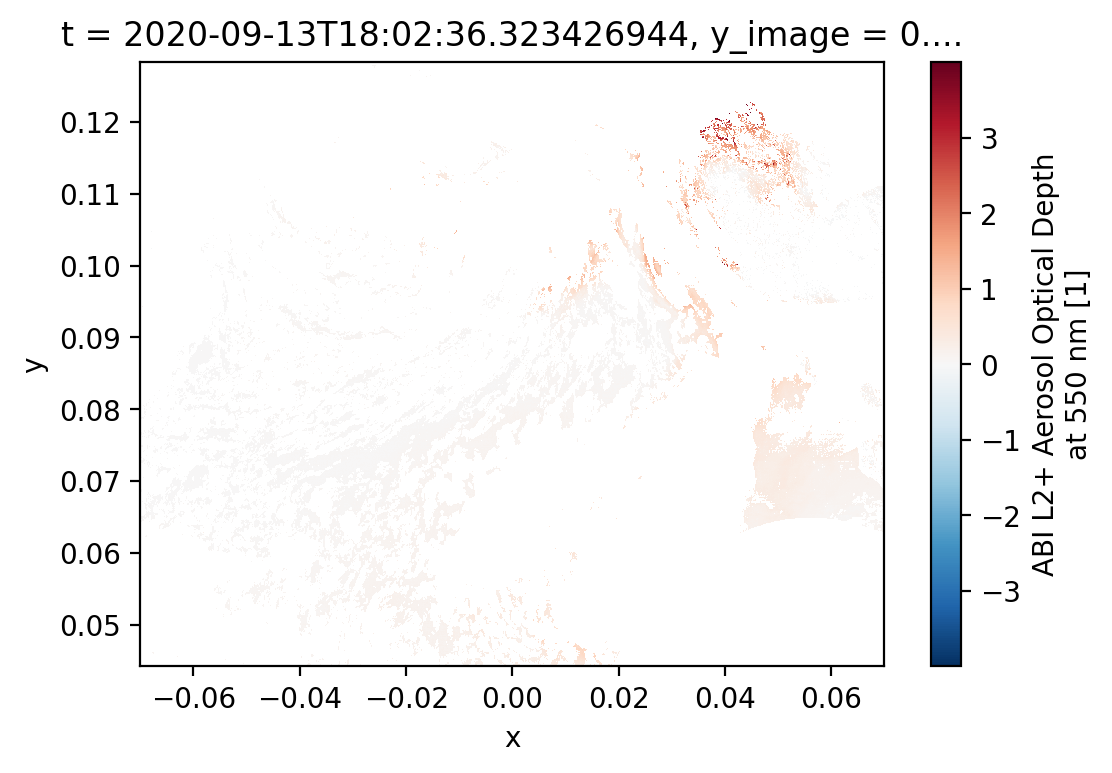

In [61]:
sat_ds.ds.AOD.where(sat_ds.ds.DQF == 0).plot()

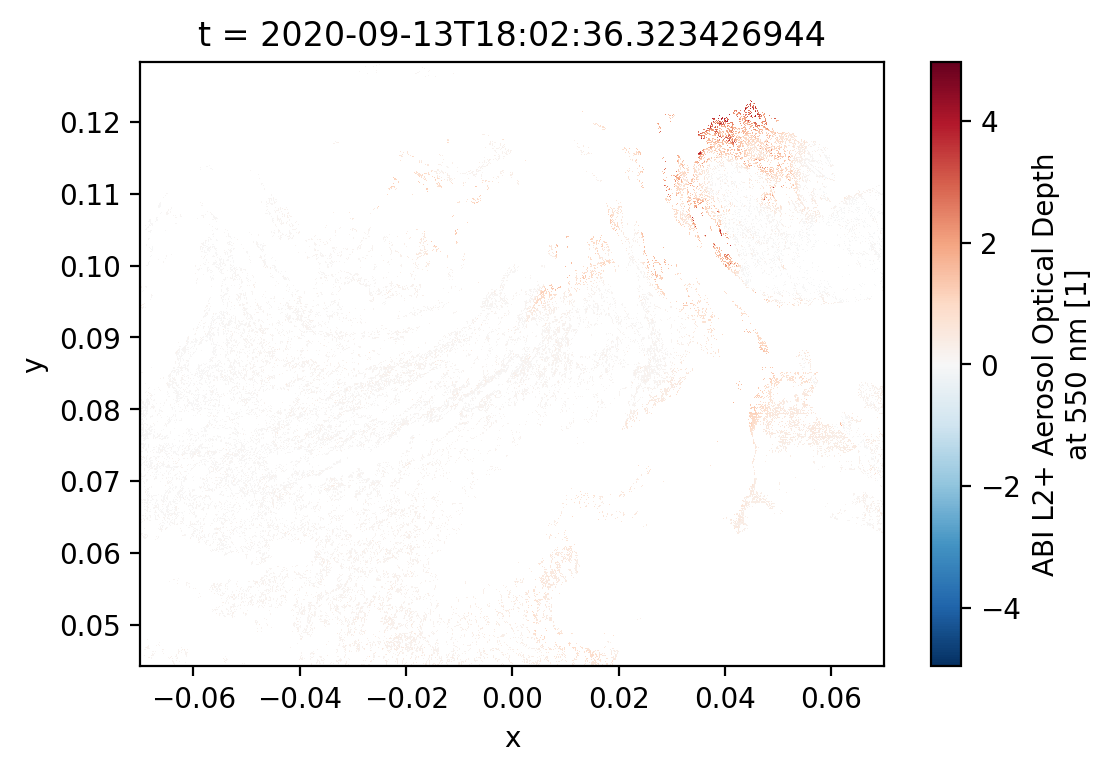

In [62]:
sat_ds.data_by_quality_medium.AOD.plot()

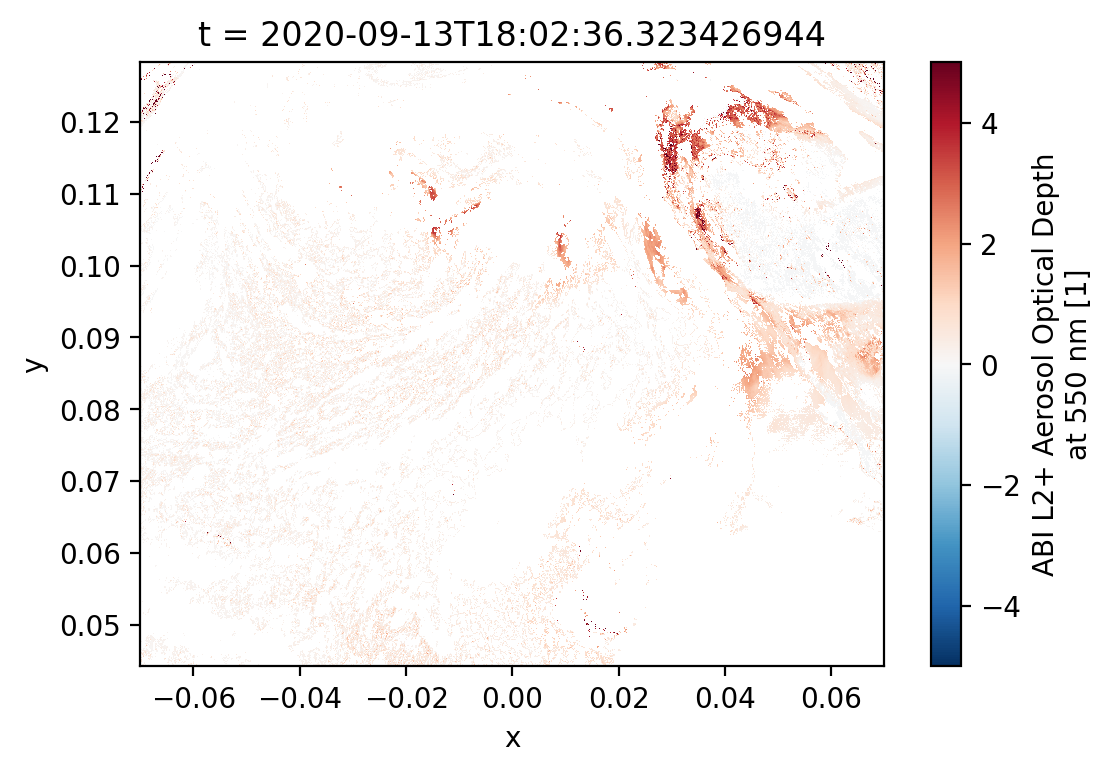

In [63]:
sat_ds.data_by_quality_low.AOD.plot()

The file should have not been identified. If it did it should be coverd in one of the sections below

In [18]:
ds = sat_ds.ds

### Quality flags and asses ... high, medium, low quality and bad

#### simple - qf is readily translated (e.g AOD)

There is only one relevant variable (valid_2D_variables) and the DQF is straight forward. In this case only set the global_qf. use qf_representation = 'as_is'

In [18]:
sat_ds.valid_2D_variables

['LST']

In [20]:
ds = sat_ds.ds

In [25]:
np.unique(ds.DQF.values)

array([ 0.,  4.,  8., 12., 16., 24.], dtype=float32)

In [21]:
for fv, fm in zip(ds.DQF.attrs['flag_values'], ds.DQF.attrs['flag_meanings'].split(' ')):
    print(f'{fv} -> {fm}')

0 -> good_retrieval_qf
0 -> valid_input_data_qf
2 -> invalid_due_to_bad_or_missing_input_data_qf
0 -> valid_clear_conditions_qf
4 -> invalid_due_to_cloudy_conditions_qf
0 -> valid_LZA_qf
8 -> degraded_due_to_LZA_threshold_exceeded_qf
0 -> valid_land_or_inland_water_surface_type_qf
16 -> invalid_due_to_water_surface_type_qf
0 -> valid_land_surface_temperature_qf
32 -> invalid_due_to_out_of_range_land_surface_temperature_qf


In [22]:
ds

<xarray.Dataset>
Dimensions:                                 (y: 1500, x: 2500,
                                             number_of_time_bounds: 2,
                                             number_of_image_bounds: 2,
                                             number_of_LZA_bounds: 2,
                                             number_of_SZA_bounds: 2)
Coordinates:
  * y                                       (y) float32 0.1282 ... 0.04427
  * x                                       (x) float32 -0.06997 ... 0.06997
    t                                       datetime64[ns] 2020-09-13T18:02:3...
    y_image                                 float32 0.08624
    x_image                                 float32 0.0
    retrieval_local_zenith_angle            float32 85.0
    quantitative_local_zenith_angle         float32 70.0
    solar_zenith_angle                      float32 180.0
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                number_of_LZA_bounds, number_of_SZA_bounds
Data variables: (12/27)
    LST                                     (y, x) float32 ...
    DQF                                     (y, x) float32 ...
    time_bounds                             (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                  int32 -2147483647
    y_image_bounds                          (number_of_image_bounds) float32 ...
    x_image_bounds                          (number_of_image_bounds) float32 ...
    ...                                      ...
    processing_parm_version_container       int32 -2147483647
    algorithm_product_version_container     int32 -2147483647
    percent_uncorrectable_GRB_errors        float64 0.0
    percent_uncorrectable_L0_errors         float64 0.0
    lon                                     (y, x) float32 175.6 ... -112.4
    lat                                     (y, x) float32 53.5 53.49 ... 14.81
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2020-09-13T18:01:17.6Z
    time_coverage_end:         2020-09-13T18:03:54.9Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        53d957bf-cd43-4d76-b229-7348d5e07378

In [594]:
ds.BCM.where(ds.DQF == 2).sum()

<xarray.DataArray 'BCM' ()>
array(78331., dtype=float32)
Coordinates:
    t                                datetime64[ns] 2018-08-01T18:03:41.06127...
    y_image                          float32 0.08624
    x_image                          float32 -0.03136
    retrieval_local_zenith_angle     float32 90.0
    quantitative_local_zenith_angle  float32 70.0
    retrieval_solar_zenith_angle     float32 180.0
    twilight_solar_zenith_angle      float32 90.0

In [170]:
global_qf = [{'high': [0], 'bad': [1,]}]
qf_by_variable = None

#### complicated - qf needs to be represented in binary and considered binwise (e.g. check ADP as a guide)

##### example COD

In [19]:
ds#.DQF

<xarray.Dataset>
Dimensions:                                                 (y: 1500, x: 2500,
                                                             number_of_time_bounds: 2,
                                                             number_of_image_bounds: 2,
                                                             number_of_sunglint_angle_bounds: 2,
                                                             number_of_LZA_bounds: 2,
                                                             number_of_SZA_bounds: 2,
                                                             land_sensor_bands: 3,
                                                             sea_sensor_bands: 4,
                                                             latitude_bands: 18,
                                                             number_of_latitude_band_bounds: 2,
                                                             num_area_types: 2)
Coordinates:
    t                                                       datetime64[ns] 20...
  * y                                                       (y) float32 0.128...
  * x                                                       (x) float32 -0.10...
    y_image                                                 float32 0.08624
    x_image                                                 float32 -0.03136
    sunglint_angle                                          float32 40.0
    retrieval_local_zenith_angle                            float32 90.0
    quantitative_local_zenith_angle                         float32 60.0
    retrieval_solar_zenith_angle                            float32 90.0
    quantitative_solar_zenith_angle                         float32 80.0
    aod_product_wavelength                                  float32 0.55
  * latitude_bands                                          (latitude_bands) float32 ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                number_of_sunglint_angle_bounds,
                                number_of_LZA_bounds, number_of_SZA_bounds,
                                land_sensor_bands, sea_sensor_bands,
                                number_of_latitude_band_bounds, num_area_types
Data variables: (12/59)
    AOD                                                     (y, x) float32 ...
    DQF                                                     (y, x) float32 ...
    time_bounds                                             (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                                  int32 -2147483647
    y_image_bounds                                          (number_of_image_bounds) float32 ...
    x_image_bounds                                          (number_of_image_bounds) float32 ...
    ...                                                      ...
    lat_band_min_aod550_sea                                 (latitude_bands) float32 ...
    lat_band_max_aod550_sea                                 (latitude_bands) float32 ...
    lat_band_mean_aod550_sea                                (latitude_bands) float32 ...
    lat_band_std_dev_aod550_sea                             (latitude_bands) float32 ...
    percent_uncorrectable_GRB_errors                        float64 nan
    percent_uncorrectable_L0_errors                         float64 nan
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v25, 05 July 2013)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2018-08-28T11:00:22.4Z
    time_coverage_end:         2018-08-28T11:00:22.4Z
    timeline_id:               ABI Mode 4
    production_data_source:    n

In [17]:
ds.DQF.attrs['flag_values']

array([ 0,  1,  0,  2,  4,  6,  8, 10, 12, 14, 16], dtype=int8)

In [24]:
np.unique(ds.DQF.values)

array([ 0.,  4.,  8., 12., 16., 24.], dtype=float32)

In [65]:
reload(ngs)

<module 'nesdis_gml_synergy.satlab' from '/mnt/telg/prog/nesdis_gml_synergy/nesdis_gml_synergy/satlab.py'>

In [68]:
for e,fm in enumerate(ds.DQF.attrs['flag_masks']):
# for e,fm in enumerate(ds.DQF.attrs['flag_values']):
    fv = ds.DQF.attrs['flag_values'][e]
    fme = ds.DQF.attrs['flag_meanings'].split()[e]
    brep = np.binary_repr(fv, width = 5)
    print(f'{fm: 4d} {fv: 4d} {brep} {int(brep[:],2)} {fme}')

   1    0 00000 0 day_algorithm_pixel_qf
   1    1 00001 1 night_algorithm_pixel_qf
  30    0 00000 0 good_quality_qf
  30    2 00010 2 degraded_quality_due_to_snow_or_sea_ice_qf
  30    4 00100 4 degraded_quality_due_to_twilight_qf
  30    6 00110 6 invalid_due_to_clear_conditions_qf
  30    8 01000 8 invalid_due_LZA_threshold_exceeded_qf
  30   10 01010 10 degraded_due_to_LZA_threshold_exceeded_qf
  30   12 01100 12 invalid_due_to_not_geolocated_qf
  30   14 01110 14 invalid_due_to_missing_or_bad_input_data_qf
  30   16 10000 16 degraded_due_to_nonconvergence_qf


In [62]:
night = True
if night:
    qf0bad = 0
else:
    qf0bad = 1 
global_qf = [{'bad':   {'bins': [0], 'values': [qf0bad,]}}, 
             {'high':   {'bins': [1,2,3,4], 'values': [0]}},  
             {'medium': {'bins': [1,2,3,4], 'values': [1,2,5,8]}},
             {'bad': {'bins': [1,2,3,4], 'values': [3,4,6,7]}},
            ]

In [63]:
int('10',2)

2

In [66]:
qfman = ngs.QfManagment(sat_ds, qf_representation='binary', global_qf=global_qf, number_of_bits=5)

In [67]:
# %%debug -b /mnt/telg/prog/nesdis_gml_synergy/nesdis_gml_synergy/satlab.py:1474
qfman.get_assesment_mask()

{'COD': {'bad': [0.0, 4.0, 6.0, 7.0, 12.0, 14.0, 15.0, 16.0],
  'low': [],
  'medium': [5.0, 11.0],
  'high': [1.0]}}

In [61]:
# %%debug -b /mnt/telg/prog/nesdis_gml_synergy/nesdis_gml_synergy/satlab.py:1474
qfman.get_assesment_mask()

{'COD': {'bad': [1.0, 5.0, 6.0, 7.0, 11.0, 12.0, 14.0, 15.0],
  'low': [],
  'medium': [4.0, 16.0],
  'high': [0.0]}}

##### example ADP

In [237]:
for e,fm in enumerate(ds.DQF.attrs['flag_masks']):
    fv = ds.DQF.attrs['flag_values'][e]
    fme = ds.DQF.attrs['flag_meanings'].split()[e]
    print(f'{fm: 4d} {fv: 4d} {np.binary_repr(fv, width = 8)} {fme}')

   1    0 00000000 good_smoke_detection_retrieval_qf
   1    1 00000001 invalid_smoke_detection_due_to_snow_ice_clouds_or_degraded_source_data_qf
   2    0 00000000 good_dust_detection_retrieval_qf
   2    2 00000010 invalid_dust_detection_due_to_snow_ice_clouds_or_bad_source_data_qf
  12    0 00000000 low_confidence_smoke_detection_qf
  12    4 00000100 medium_confidence_smoke_detection_qf
  12   12 00001100 high_confidence_smoke_detection_qf
  48    0 00000000 low_confidence_dust_detection_qf
  48   16 00010000 medium_confidence_dust_detection_qf
  48   48 00110000 high_confidence_dust_detection_qf
  64    0 00000000 out_of_sun_glint_qf
  64   64 01000000 within_sun_glint_qf
 128    0 00000000 within_valid_solar_and_satellite_zenith_angle_range_qf
 128  128 10000000 outside_valid_solar_or_satellite_zenith_angle_range_qf


In [ ]:
global_qf = [{'good': {'bins': [6], 'values': [1]}}, 
             {'bad': {'bins': [7], 'values': [1]}}]

In [244]:
qf_by_variable =  {'Aerosol': 'ignore',
                   'Smoke': {"bad":    {'bins': [0,],  'values':[1,]},
                             "low" :   {'bins': [2,3], 'values':[0,]},
                             "medium": {'bins': [2,3], 'values':[1,]},
                             "high":   {'bins': [2,3], 'values':[3,]},},
                    'Dust': {"bad":    {'bins': [1,],  'values':[1,]},
                             "low" :   {'bins': [4,5], 'values':[0,]},
                             "medium": {'bins': [4,5], 'values':[1,]},
                             "high":   {'bins': [4,5], 'values':[3,]},}}

### create a new subclass of GeosSatteliteProducts in nesdis_gml_synergy.satlab

explore the quality flags in the opened file and decide whats considered high, medium, low and bad

### Add qf attributes

In [459]:
ds

<xarray.Dataset>
Dimensions:                                 (lat: 166, lon: 394,
                                             number_of_time_bounds: 2,
                                             number_of_image_bounds: 2,
                                             number_of_LZA_bounds: 2,
                                             number_of_SZA_bounds: 2,
                                             number_of_wavelength_bounds: 2)
Coordinates:
    t                                       datetime64[ns] ...
  * lat                                     (lat) float32 55.62 55.38 ... 14.38
  * lon                                     (lon) float32 -151.6 ... -53.38
    lat_image                               float32 ...
    lon_image                               float32 ...
    retrieval_local_zenith_angle            float32 ...
    quantitative_local_zenith_angle         float32 ...
    retrieval_solar_zenith_angle            float32 ...
    quantitative_solar_zenith_angle         float32 ...
    dsr_product_wavelength                  float32 ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                number_of_LZA_bounds, number_of_SZA_bounds,
                                number_of_wavelength_bounds
Data variables: (12/32)
    DSR                                     (lat, lon) float32 ...
    DQF                                     (lat, lon) float32 1.0 1.0 ... 1.0
    time_bounds                             (number_of_time_bounds) datetime64[ns] ...
    goes_lat_lon_projection                 int32 ...
    lat_image_bounds                        (number_of_image_bounds) float32 ...
    lon_image_bounds                        (number_of_image_bounds) float32 ...
    ...                                      ...
    std_dev_dsr                             float32 ...
    percent_uncorrectable_GRB_errors        float32 ...
    percent_uncorrectable_L0_errors         float32 ...
    algorithm_dynamic_input_data_container  int32 ...
    processing_parm_version_container       int32 ...
    algorithm_product_version_container     int32 ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2021-05-23T18:01:16.9Z
    time_coverage_end:         2021-05-23T18:03:54.2Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        3386a01d-60c2-4fee-b8e8-9465d58f8837

In [500]:
reload(ngs)

<module 'nesdis_gml_synergy.satlab' from '/mnt/telg/prog/nesdis_gml_synergy/nesdis_gml_synergy/satlab.py'>

In [501]:
class ABI_L2_TEST(ngs.GeosSatteliteProducts):
    def __init__(self, *args):
        '''for testing'''
        super().__init__(*args)
        
        global_qf = [{'high': [0], 'bad': [1,]}]
        
        self.qf_managment = ngs.QfManagment(self, 
                                        qf_representation='as_is', 
                                        # qf_representation='binary', 
                                        # qf_by_variable = qf_by_variable, 
                                        global_qf= global_qf, 
                                        # number_of_bits=8
                                       )

## check if it worked

### initiate

In [502]:
test = ABI_L2_TEST(ds)

In [503]:
test.qf_managment.qf_by_variable

{'DSR': {'high': [0], 'bad': [1]}}

In [504]:
test.data_by_quality_high

<xarray.Dataset>
Dimensions:  (lat: 166, lon: 394)
Coordinates:
    t        datetime64[ns] 2021-05-23T18:02:35.612561024
  * lat      (lat) float32 55.62 55.38 55.12 54.88 ... 15.12 14.88 14.62 14.38
  * lon      (lon) float32 -151.6 -151.4 -151.1 -150.9 ... -53.88 -53.62 -53.38
Data variables:
    DSR      (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

(<mpl_toolkits.basemap.Basemap at 0x7f7c7ba97910>,
 <matplotlib.colorbar.Colorbar at 0x7f7c7ba5b6a0>)

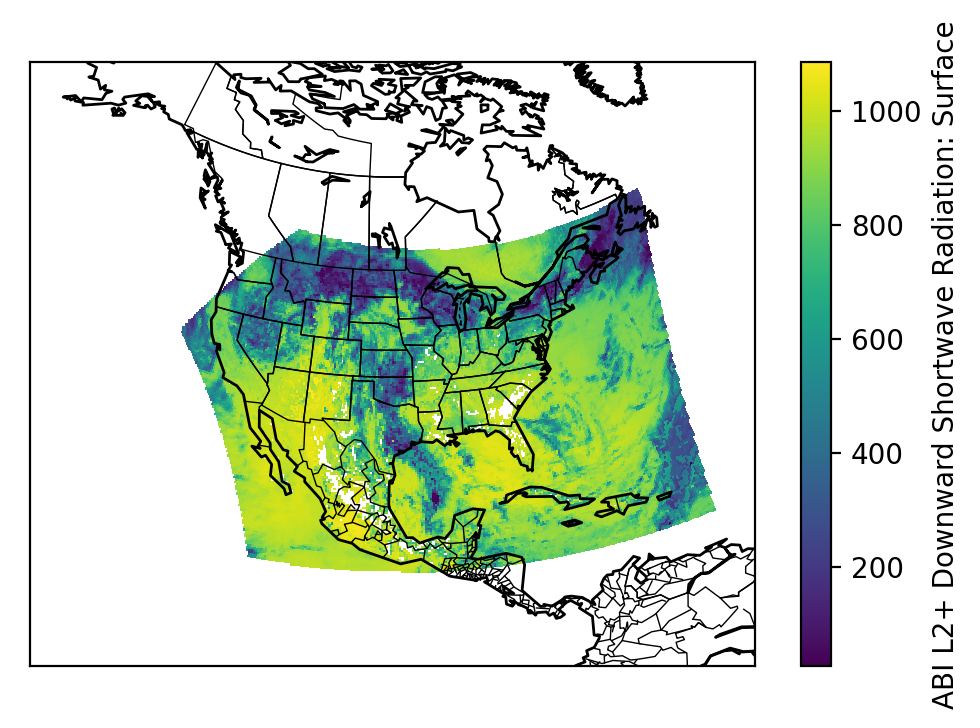

In [516]:
test.plot('DSR', valid_qf=False)

### pixel and area projectsion

In [505]:
import atmPy.data_archives.NOAA_ESRL_GMD_GRAD.surfrad.surfrad as surfrad
stations = surfrad.network.stations

In [506]:
proj = test.project_on_sites(stations)

In [509]:
proj.distance_grids

<xarray.DataArray (lat: 166, lon: 394, site: 7)>
array([[[4834.7344, 4050.997 , 3773.109 , ..., 3223.4468, 5196.091 ,
         5427.239 ],
        [4819.14  , 4035.3513, 3757.5466, ..., 3207.8135, 5180.396 ,
         5412.0605],
        [4803.5396, 4019.7017, 3741.9932, ..., 3192.1763, 5164.7017,
         5396.8706],
        ...,
        [3054.0483, 3282.7312, 4084.0466, ..., 3516.564 , 3628.7837,
         2411.96  ],
        [3068.8152, 3298.3564, 4099.723 , ..., 3532.0818, 3642.9404,
         2425.1091],
        [3083.6099, 3313.987 , 4115.403 , ..., 3547.5928, 3657.1328,
         2438.3176]],

       [[4837.9883, 4053.3384, 3769.6396, ..., 3226.0728, 5195.954 ,
         5434.407 ],
        [4822.3027, 4037.6013, 3753.9653, ..., 3210.351 , 5180.159 ,
         5419.147 ],
        [4806.611 , 4021.8591, 3738.2996, ..., 3194.6255, 5164.3643,
         5403.875 ],
...
        [4379.561 , 5174.006 , 5708.791 , ..., 5974.6133, 4213.505 ,
         3719.4067],
        [4397.9644, 5192.201 , 5729.3735, ..., 5991.9263, 4234.7983,
         3734.5295],
        [4416.419 , 5210.4336, 5749.9746, ..., 6009.265 , 4256.1284,
         3749.7441]],

       [[6719.56  , 6119.59  , 5322.0874, ..., 5675.96  , 6533.338 ,
         7605.9595],
        [6698.4   , 6100.1494, 5301.996 , ..., 5659.2637, 6510.4067,
         7584.891 ],
        [6677.247 , 6080.7275, 5281.9316, ..., 5642.601 , 6487.4805,
         7563.823 ],
        ...,
        [4399.894 , 5194.5215, 5726.727 , ..., 5995.918 , 4230.5625,
         3742.457 ],
        [4418.247 , 5212.683 , 5747.287 , ..., 6013.2085, 4251.8076,
         3757.5144],
        [4436.652 , 5230.8804, 5767.865 , ..., 6030.525 , 4273.089 ,
         3772.6646]]], dtype=float32)
Coordinates:
  * site     (site) <U3 'BND' 'SXF' 'TBL' 'DRA' 'FPK' 'GWN' 'PSU'
  * lon      (lon) float32 -151.6 -151.4 -151.1 -150.9 ... -53.88 -53.62 -53.38
  * lat      (lat) float32 55.62 55.38 55.12 54.88 ... 15.12 14.88 14.62 14.38

In [515]:
# %%debug -b /mnt/telg/prog/nesdis_gml_synergy/nesdis_gml_synergy/satlab.py:955
proj.projection2area.sel(site = 'TBL', stats = 'median', radius = 10)

<xarray.Dataset>
Dimensions:              (data_quality: 1)
Coordinates:
    radius               int64 10
    stats                <U6 'median'
    t                    datetime64[ns] 2021-05-23T18:02:35.612561024
    site                 <U3 'TBL'
  * data_quality         (data_quality) <U4 'high'
Data variables:
    DSR                  (data_quality) float32 779.8
    num_of_valid_points  (data_quality) int64 1

In [513]:
proj.projection2point.sel(site = 'TBL')

<xarray.Dataset>
Dimensions:                     ()
Coordinates:
    site                        <U3 'TBL'
Data variables:
    DSR                         float32 779.8
    argmin_x                    float32 62.0
    argmin_y                    float32 186.0
    lon_gritpoint               float32 -105.1
    lat_gridpoint               float32 40.12
    lon_station                 float32 -105.2
    lat_station                 float32 40.12
    distance_station_gridpoint  float32 9.515
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2021-05-23T18:01:16.9Z
    time_coverage_end:         2021-05-23T18:03:54.2Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        3386a01d-60c2-4fee-b8e8-9465d58f8837

In [127]:
np.unique(test.ds.DQF.values)

array([0., 1., 2., 4., 6.], dtype=float32)

### Does it open after adding to package

In [518]:
reload(ngs)

<module 'nesdis_gml_synergy.satlab' from '/mnt/telg/prog/nesdis_gml_synergy/nesdis_gml_synergy/satlab.py'>

In [519]:
sat_ds = ngs.open_file('/mnt/telg/data/nesdis/goes/ABI_L2_DSR/OR_ABI-L2-DSRC-M6_G16_s20211431801169_e20211431803542_c20211431810229.nc', verbose=True)

product name: ABI-L2-DSRC-M6
identified as: ABI_L2_DSR.


In [520]:
proj = sat_ds.project_on_sites(stations)

In [521]:
proj.projection2area#.sel(site = 'BND', stats = 'mean', radius = 50, 
                         # data_quality = 'good'
                        # )

<xarray.Dataset>
Dimensions:              (radius: 5, stats: 3, data_quality: 1, site: 7)
Coordinates:
  * radius               (radius) int64 5 10 25 50 100
  * stats                (stats) <U6 'median' 'mean' 'std'
    t                    datetime64[ns] 2021-05-23T18:02:35.612561024
  * site                 (site) <U3 'BND' 'SXF' 'TBL' 'DRA' 'FPK' 'GWN' 'PSU'
  * data_quality         (data_quality) <U4 'high'
Data variables:
    DSR                  (data_quality, radius, stats, site) float32 nan ... ...
    num_of_valid_points  (data_quality, radius, site) int64 0 0 0 0 ... 62 50 53

In [522]:
proj.projection2point

<xarray.Dataset>
Dimensions:                     (site: 7)
Coordinates:
  * site                        (site) <U3 'BND' 'SXF' 'TBL' ... 'GWN' 'PSU'
Data variables:
    DSR                         (site) float32 914.1 851.8 779.8 ... 863.1 666.7
    argmin_x                    (site) float32 62.0 48.0 62.0 ... 29.0 85.0 60.0
    argmin_y                    (site) float32 253.0 220.0 186.0 ... 247.0 295.0
    lon_gritpoint               (site) float32 -88.38 -96.62 ... -89.88 -77.88
    lat_gridpoint               (site) float32 40.12 43.62 40.12 ... 34.38 40.62
    lon_station                 (site) float32 -88.37 -96.62 ... -89.87 -77.93
    lat_station                 (site) float32 40.05 43.73 40.12 ... 34.25 40.72
    distance_station_gridpoint  (site) float32 8.231 12.05 9.515 ... 13.38 11.56
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2021-05-23T18:01:16.9Z
    time_coverage_end:         2021-05-23T18:03:54.2Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        3386a01d-60c2-4fee-b8e8-9465d58f8837

In [ ]:
scale = 0.5
width=2800000 *scale
height=1700000 * scale
a, bmap = surfrad.network.stations.Table_Mountain.plot(width=width, height=height)
bmap, pc, cb = sat_ds.plot('Temp', bmap = bmap)
bmap.drawcounties()
# f = plt.gcf()
# pc.set_clim(vmax= 10)